In [157]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [158]:
ab = '../../lr_bulk/talon/human_talon_abundance.tsv'
filt_ab = '../../lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
read_annot = '../../lr_bulk/talon/human_talon_read_annot.tsv'
t_metadata = '../../refs/cerberus/v40_transcript_metadata.tsv'
lib_metadata = '../../lr_bulk/lr_human_library_data_summary.tsv'
ver = 'v40_cerberus'
min_tpm = 1
gene_subset = 'polya'
obs_col = 'sample'
swan_file = '../../lr_bulk/cerberus/swan/swan_meta.p'
cerberus_h5 = '../../lr_bulk/cerberus/triplets/cerberus_annot_triplets.h5'


mouse_lib_metadata = '../../mouse/lr_bulk/lr_mouse_library_data_summary.tsv'
mouse_swan_file = '../../mouse/lr_bulk/swan/swan.p'

sr_ab = '../../sr_bulk/TPM_matrix.tsv'


## Box plots for number of libraries, samples, and tissues / cell types

In [ ]:
h_meta = pd.read_csv(lib_metadata, sep='\t')
m_meta = pd.read_csv(mouse_lib_metadata, sep='\t')

In [ ]:
h_meta['species'] = 'Human'
m_meta['species'] = 'Mouse'
keep_cols = ['dataset', 'sample', 'general_tissue_cell_type', 'tissue_or_cell_line', 'species']
df = pd.concat([h_meta, m_meta], axis=0)[keep_cols]

In [ ]:
# gb species and tissue_or_cell_line and count libraries
temp = df.groupby(['tissue_or_cell_line', 'species']).count().reset_index()
temp = temp[['tissue_or_cell_line', 'species', 'dataset']]
temp.rename({'dataset': 'n_libraries'}, axis=1, inplace=True)

# gb species and tissue_or_cell_line and count samples
temp2 = df.groupby(['tissue_or_cell_line', 'species']).nunique().reset_index()
temp2 = temp2[['tissue_or_cell_line', 'species', 'sample']]
temp2.rename({'sample': 'n_samples'}, axis=1, inplace=True)
temp = temp.merge(temp2, on=['species', 'tissue_or_cell_line'])

# gb species and tissue_or_cell_line and count general tissue / cell line
temp3 = df.groupby(['tissue_or_cell_line', 'species']).nunique().reset_index()
temp3 = temp3[['tissue_or_cell_line', 'species', 'general_tissue_cell_type']]
temp3.rename({'general_tissue_cell_type': 'n_general'}, axis=1, inplace=True)
temp = temp.merge(temp3, on=['species', 'tissue_or_cell_line'])

In [16]:
def make_summary_box_plot(temp, y, ylabel, ofile):
    sns.set_context('paper', font_scale=2)
    plt.figure(figsize=(3,2.25))
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['pdf.fonttype'] = 42

    c_dict, order = get_tissue_cell_line_colors()    
    ax = sns.barplot(data=temp, x='species', y=y,
                hue='tissue_or_cell_line',
                palette=c_dict, saturation=1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    xlabel = ''
    ylabel = ylabel

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    ax.get_legend().remove()
    _ = ax.set(xlabel=xlabel, ylabel=ylabel)

    def add_perc_2(ax):
        ylim = ax.get_ylim()[1]
        n_cats = len(ax.patches)
        for p in ax.patches:
            label = '{:.0f}'.format(p.get_height())
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + ylim*0.01
            ax.annotate(label, (x, y), size=16, horizontalalignment='center')


    add_perc_2(ax)
    plt.savefig(ofile, dpi=500, layout='tight', bbox_inches="tight")

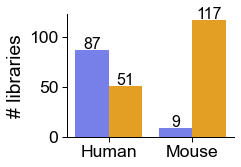

In [17]:
make_summary_box_plot(temp, 'n_libraries', '# libraries', 'figures/library_box_plot.pdf')

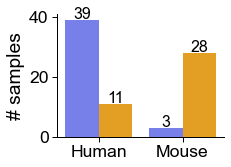

In [18]:
make_summary_box_plot(temp, 'n_samples', '# samples', 'figures/sample_box_plot.pdf')

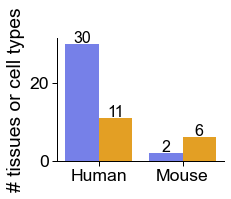

In [21]:
make_summary_box_plot(temp, 'n_general', '# tissues or cell types', 'figures/general_box_plot.pdf')

## Number of libraries vs. number of tissues / cell lines

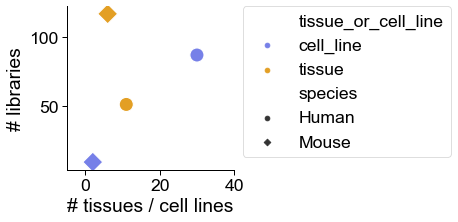

In [53]:
sns.set_context('paper', font_scale=2)
plt.figure(figsize=(3,3))
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

style_dict = {'Human': 'o', 'Mouse': 'D'}
c_dict, order = get_tissue_cell_line_colors()
ax = sns.scatterplot(data=temp, x='n_general', y='n_libraries',
            hue='tissue_or_cell_line', style='species', markers=style_dict,
            palette=c_dict, alpha=1, s=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xlabel = '# tissues / cell lines'
ylabel = '# libraries'
xlim = (-5, 40)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
_ = ax.set(xlabel=xlabel, ylabel=ylabel, xlim=xlim)

fname = 'figures/data_summary_libraries_v_tissue_cell_line.pdf'
plt.savefig(fname, dpi=500, layout='tight', bbox_inches="tight")

## Human sample color legend

Read in graph from ../../lr_bulk/cerberus/swan/swan_meta.p


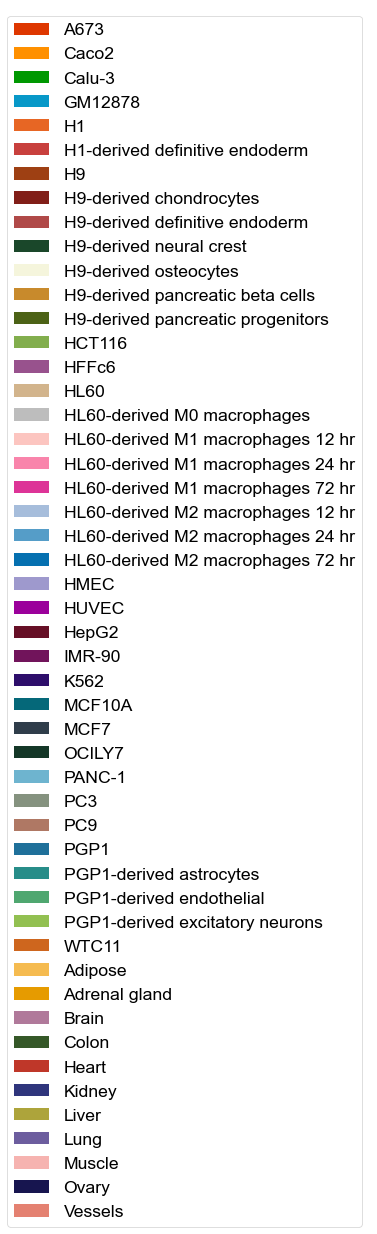

In [3]:
plot_human_sample_legend(swan_file,
                   'human_sample_color_legend.pdf')

## Mouse sample color legend

Read in graph from ../../mouse/lr_bulk/swan/swan.p


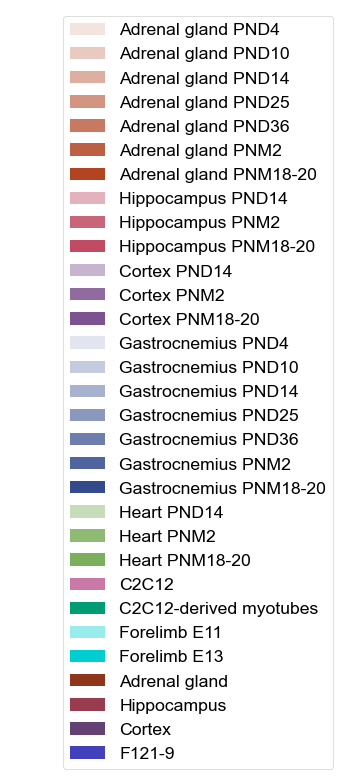

In [4]:
plot_mouse_sample_legend(mouse_swan_file,
                   'mouse_sample_color_legend.pdf')

## Short-read gene detection by biotype from all samples

Calculating short-read gene TPM values
Subsetting for polya genes
Applying gene type subset
Number of genes reported: 49093
Detected 49093 / 52274 (93.9%) annotated polyA genes
protein_coding
92.13027816690014

lncRNA
53.10457516339869

pseudogene
44.641628834777826



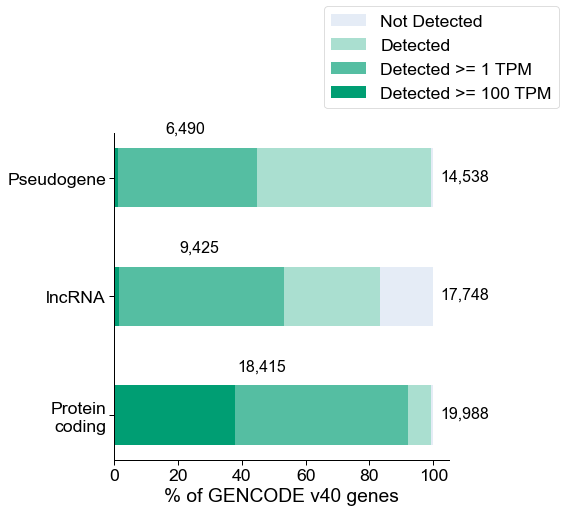

In [7]:
df = pd.read_csv(sr_ab, sep='\t')
plot_gene_det_by_biotype_tpm(df,
                             how='sr',
                             ver=ver,
                             opref='figures/sr_')

## Short read gene detection by biosample for all samples

Calculating short-read gene TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # genes detected: 58780
# genes >= 1 tpm: 38053
Applying gene type subset
Number of genes reported: 34330
Found 78 total samples


<Figure size 432x288 with 0 Axes>

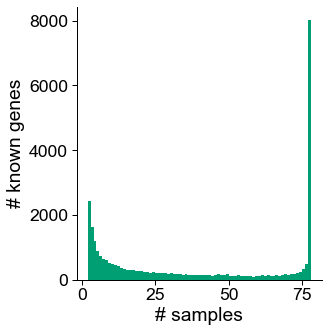

In [8]:
df = pd.read_csv(sr_ab, sep='\t')
df = plot_biosamp_det(df,
                 how='sr',
                 min_tpm=min_tpm,
                 gene_subset=gene_subset,
                 groupby='sample',
                 opref='figures/sr')

In [5]:
# number of additional samples that were sequences with short read
# that weren't with long read
78-41

37

## UMAP for short-read on matching samples

Calculating short-read gene TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # genes detected: 58780
# genes >= 1 tpm: 38053
Applying gene type subset
Number of genes reported: 34330


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/plotting.py:4853: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(obs=obs, var=var, X=X)
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/plotting.py:4866: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_col] = adata.obs[obs_col].astype('category')
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to c

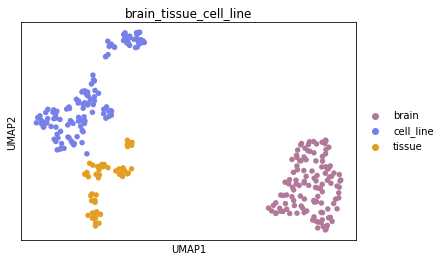

In [4]:
plot_sr_brain_tissue_cell_line_umap(sr_ab,
                                    lib_metadata,
                                    min_tpm,
                                    gene_subset,
                                    'lr_match',
                                    'figures/sr_gene_lr_match_brain_tissue_cell_line_umap.pdf')

## Transcript detection and length for MANE transcripts

In [247]:
def plot_perc_mane_det_by_len(ab,
                              filt_ab,
                              t_metadata,
                              min_gene_tpm,
                              min_tpm,
                              obs_col,
                              max_t_len,
                              figsize=(6,4),
                              fname='figures/mane_det_by_len.pdf'):
    # get detected genes
    g_df = pd.read_csv(ab, sep='\t')
    g_df = get_det_table(g_df,
                     how='gene',
                     min_tpm=min_gene_tpm,
                     gene_subset='polya',
                     groupby='library')
    gids = g_df.columns.tolist()    

    # get all the mane transcripts 
    # that are from genes we detect > 10 TPM
    t_df = pd.read_csv(t_metadata, sep='\t')
    t_df = t_df.loc[t_df.MANE_Select==True]
    t_df['gid_stable'] = cerberus.get_stable_gid(t_df, 'gid')
    t_df = t_df.loc[t_df.gid_stable.isin(gids)]
    
    # get all detected transcripts
    df = pd.read_csv(filt_ab, sep='\t')
    df = get_det_table(df,
                   how='iso',
                   min_tpm=min_tpm,
                   gene_subset='polya', 
                   groupby=obs_col)
    tids = df.columns
    det_df = pd.DataFrame(data=tids, columns=['tid'])
    det_df['detected'] = True
    
    # merge detected transcripts in w/ mane transcripts
    t_df = t_df.merge(det_df, on='tid', how='left')
    t_df = t_df[['tid', 'gname', 't_len', 'detected']]
    t_df.detected.fillna(False, inplace=True)
                              
    # only get shorter bois and bin by kb
    t_df = t_df.loc[t_df.t_len<=max_t_len]
    bins = [i for i in range(0, t_df.t_len.max()+1000, 1000)]
    t_df['len_bin'] = pd.cut(t_df.t_len, bins)
                              
    # total transcripts / bin
    total_df = t_df[['tid', 'len_bin']].groupby('len_bin').count().reset_index()
    total_df.rename({'tid': 'n_total'}, axis=1, inplace=True)
                              
    # total transcripts / bin by det status
    det_df = t_df[['tid', 'detected', 'len_bin']].groupby(['detected', 'len_bin']).count().reset_index()
    det_df = det_df.merge(total_df, on='len_bin', how='left')
    
    # calculate % detected and limit to only the detected transcripts
    det_df['perc'] = (det_df.tid/det_df.n_total)*100
    det_df.perc.fillna(0, inplace=True)
    det_df = det_df.loc[det_df.detected]
    
    # make nicer bin names
    hr_bin_dict = {}
    for b in det_df.len_bin.unique():
        bmin = str(int(int(str(b)[1:].split(',')[0])/1000))
        bmax = str(int(int(str(b).split(', ')[1][0:-1])/1000))
        hr_bin_dict[b] = f'{bmin}-{bmax}'
    det_df['hr_len_bin'] = det_df['len_bin'].map(hr_bin_dict)
    
    # make the beautiful plot
    sns.set_context('paper', font_scale=2)
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['pdf.fonttype'] = 42

    height = figsize[1]
    width = figsize[0]
    aspect = width/height

    color = get_talon_nov_colors()[0]['Known']

    ax = sns.catplot(det_df, x='hr_len_bin', y='perc', kind='bar', 
                     color=color, saturation=1,
                     height=height, aspect=aspect)
    xlabel = 'Transcript length (kb)'
    ylabel = '% of detected GENCODE \n v40 MANE transcripts'
    ylim = (0,100)
    ax.set(xlabel=xlabel, ylabel=ylabel, ylim=ylim)
    ax.tick_params(axis="x", rotation=45)

    def add_perc_2(ax):
        ylim = ax.get_ylim()[1]
        n_cats = len(ax.patches)
        for p in ax.patches:
            perc = p.get_height()
            tot = det_df.loc[det_df.perc==perc, 'tid'].values[0]
            x = p.get_x() + p.get_width() / 2 - (0.02)*n_cats
            y = p.get_y() + p.get_height() + ylim*0.04
            ax.annotate(tot, (x, y), size = 18, rotation=90)

    a = ax.axes[0,0]
    add_perc_2(a)
    
    plt.savefig(fname, dpi=500, bbox_inches='tight')
    
    return det_df


Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2047: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2046: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 10 tpm: 39652
Applying gene type and novelty subset
Number of genes reported: 20655
Found 138 total libraries
Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
Found 50 total samples


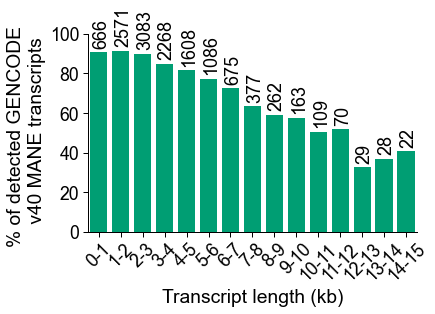

In [248]:
df = plot_perc_mane_det_by_len(ab,
                          filt_ab,
                          t_metadata,
                          min_gene_tpm=10,
                          min_tpm=1,
                          obs_col=obs_col,
                          max_t_len=15000,
                          figsize=(6,4),
                          fname='figures/mane_det_by_len.pdf')

In [252]:
# what % of mane transcripts do we detect between 9-12kb
len_bins = ['9-10', '10-11', '11-12']
temp = df.loc[df.hr_len_bin.isin(len_bins)]
n = temp.n_total.sum()
n_num = temp.tid.sum()
print(f'{(n_num/n)*100:.2f}% detected MANE transcripts ({n_num}/{n}) from expressed genes from 9-12kb')

54.03% detected MANE transcripts (342/633) from expressed genes from 9-12kb


## What % of GENCODE v40 polyA transcripts are <12kb long?

In [261]:
df, _, _ = get_gtf_info(how='iso', ver=ver, subset=gene_subset)

In [262]:
n = len(df.index)
n_num = len(df.loc[df.t_len < 12000].index)
print(f'{(n_num/n)*100:.2f}% GENCODE v40 polyA transcripts ({n_num}/{n}) are <12kb long')

99.65% GENCODE v40 polyA transcripts (234736/235562) are <12kb long
